<a href="https://colab.research.google.com/github/maximmillion/ConvolutionExp/blob/main/bag_of_visual_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 

from random import randint
import numpy as np

import matplotlib.pyplot as plt
import cv2

from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from tensorflow.keras import datasets, layers, models
from xgboost import XGBClassifier
%matplotlib inline

# Making the dataset:

In [3]:
# Create 250 squares
NUM_SQUARES = 250
WIDTH = 128

X_train = []
for i in range(NUM_SQUARES):
    exp = np.zeros((WIDTH, WIDTH)) #  128*128 canvas 
    x_start = randint(0, WIDTH - 1)
    x_end = randint(x_start, WIDTH)
    y_start = randint(0, WIDTH - 1)
    y_end = randint(y_start, WIDTH)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    X_train.append(exp)

In [4]:
# Create 250 circles
for i in range(NUM_SQUARES):
    x = np.arange(0, WIDTH)
    y = np.arange(0, WIDTH)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, WIDTH)
    cy = randint(0, WIDTH)
    r = randint(0, WIDTH / 2)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
print(len(X_train))

500


In [5]:
# Creating Labels for Circles and Squares
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])

In [6]:
# Shuffle training data
shuffler = np.random.permutation(NUM_SQUARES*2)

X_train = np.array(X_train)

x_train = X_train[shuffler]
y_train = Y_train[shuffler]

1


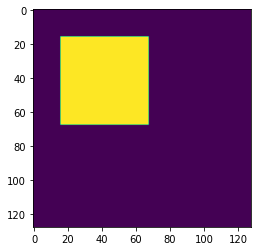

In [7]:
print(y_train[101])
plt.imshow(x_train[101])

# Descriptors extraction:

In [8]:
import cv2
# Create List where all the descriptors will be stored
des_list = []

# BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.xfeatures2d.SIFT_create()

In [9]:
#!pip install opencv-python==4.4.*
#!pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10
#cv2.__version__
#!pip install opencv-contrib-python==4.4.* opencv-python==4.4.*

'4.4.0'

In [10]:
# We will convert the image as 8 bit integer, cv2.detectAndCompute expects 8 bit integers
# it took quite some time to figure this out
x_train = x_train.astype('uint8')
x_train_shapped =  x_train.reshape(len(x_train), WIDTH, WIDTH, 1)

In [11]:
# loop over the image and find the descriptions
for im in x_train:
    kpts, des = brisk.detectAndCompute(im, None)
    des_list.append(des) 

In [12]:
# let's analyze the words / descriptors 
lens_desc = [len(desc) for desc in des_list]

print('Total descriptors :', sum(lens_desc_desc))
print('Unique descriptors :', sum(list(set(lens_desc))))

TypeError: ignored

In [13]:
print(des_list) #descriptor list

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

### So, we can't apply bag of words technique to our synthetic dataset as there are no descriptors / words found in our synthetic images. It is due to the fact that we have only two values in the pixels i.e; 1 / 0. Also the shapes are quite simple.